<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

## Taller 10 - NLP
### Keylan Rolando Valencia Castillo
###### Nube de Palabras en Python - DataSet  Pull de Opiniones de Guitarras compradas a través de Amazon



In [5]:
# Importar las Librerías

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stopwords = stopwords.words('English')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [6]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud , ImageColorGenerator

In [7]:
import re

In [8]:
#cargar el set de datos

df = pd.read_csv('C:/Users/KeylanRolandoValenci/Documents/Varios Keylan/Clases Especialización/Clases Especialización/Semestre II/NLP/Musical_instruments_reviews.csv', encoding='Latin')
df.summary.value_counts()

Great                               42
Five Stars                          32
Great!                              30
Perfect                             27
Good                                25
                                    ..
Perfect for a small apartment        1
Minus 1 star for price.....          1
Good little mixer                    1
Not the best for this price          1
Great strap for the money but...     1
Name: summary, Length: 8852, dtype: int64

In [9]:
# Pre-procesar el texto

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto
df["preprocesado"] = df.summary.apply(lambda texto: pre_procesado(texto))

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,preprocesado
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",good
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",jake
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",job well
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",good windscreen money
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",pops record vocals


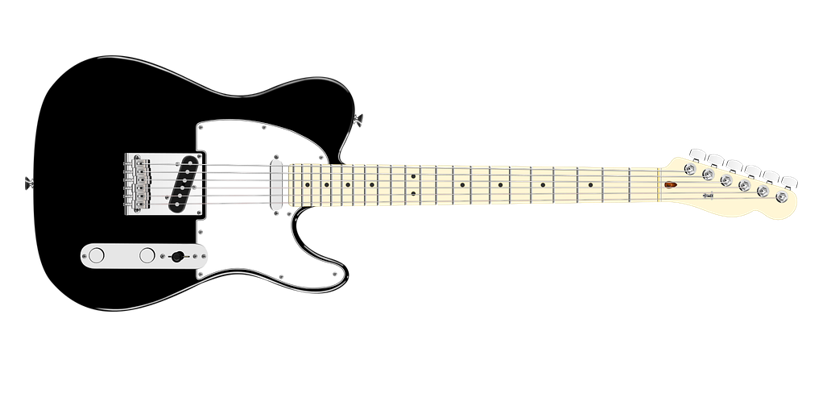

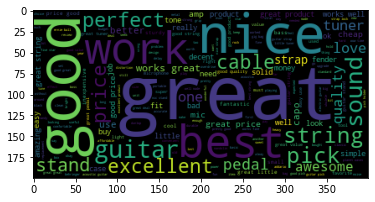

In [12]:
# Cargar imagen máscara, convertir en matriz y visualizar primera versión de la nube. 
palabras = df.preprocesado.str.cat(sep=' ')
Nube = WordCloud().generate(palabras)

img = PIL.Image.open('C:/Users/KeylanRolandoValenci/Downloads/fender.png')
display(img)
mask = np.array(img)
mask
plt.imshow(Nube)
#plt.show()

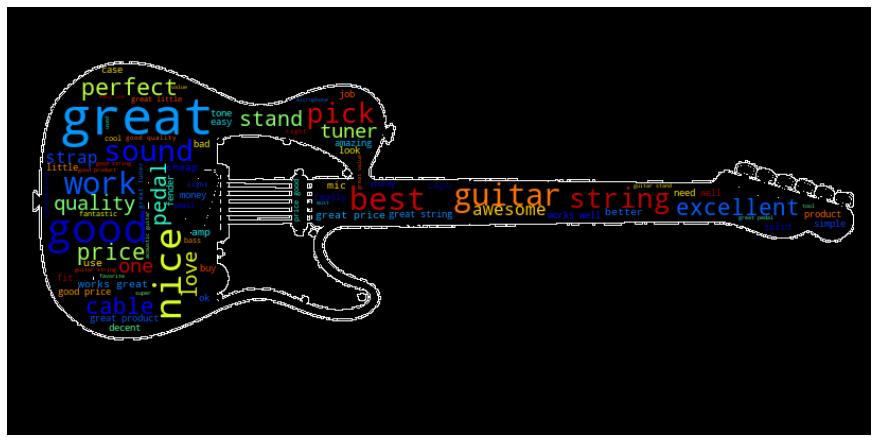

In [13]:
palabras = df.preprocesado.str.cat(sep=' ')
Nube = WordCloud(width=800, height=400, max_words=80, max_font_size=150,        
                 background_color="black", colormap="jet",
                collocations=True, contour_width=0.25, contour_color="white", mask=mask).generate(palabras)

image_colors=ImageColorGenerator(mask)
Nube.to_file('tarra.png')

plt.figure(figsize=(12,10))
plt.imshow(Nube, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
